https://www.cienciadedatos.net/documentos/py09_gradient_boosting_python

In [24]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ==============================================================================
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance
from scipy.stats import randint
import multiprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

# Bayesian
# ==============================================================================
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold,StratifiedKFold
from sklearn.metrics import classification_report
import xgboost as xgb
from collections import Counter
import time
import optuna
from optuna.samplers import TPESampler
from sklearn.datasets import make_classification

In [17]:
#carga los datos
tabla_final = pd.read_csv('Tabla_final_colab.csv', sep = ",")


## Se borran columnas irrelevantes ##
tabla_final = tabla_final.drop('FECHA_DATO', axis=1)
tabla_final = tabla_final.drop('FECHA_PROCESO', axis=1)
tabla_final = tabla_final.drop('ID_PROD', axis=1)
tabla_final = tabla_final.drop('FLAG_PREAP', axis=1)

## Definimos una tabla con los id de clientes
## Para luego poeder funtarla con las prob ##
## Si se queda se considera como parametro ##
tabla_con_id_cliente = tabla_final

tabla_final = tabla_final.drop('ID_CLIENTE', axis=1)
#visualizamos los datos
tabla_final

,CT_CTE,DEBITO_DIR,ID_EMPLEADO,ID_SEGMENTO_VALOR,ANTIGUEDAD,RENTA,EDAD,EDAD_PUNTAJE,ID_GENERO,ACEPTADO
0,1.0,0.0,0.0,2.0,6.0,87218.10,36.0,3.0,1.0,0.0
1,1.0,0.0,0.0,1.0,35.0,122179.11,23.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,35.0,119775.54,23.0,1.0,1.0,0.0
3,1.0,0.0,0.0,1.0,35.0,22220.04,24.0,1.0,1.0,0.0
4,1.0,0.0,0.0,1.0,35.0,295590.36,24.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
602555,0.0,0.0,0.0,2.0,62.0,97397.16,41.0,6.0,1.0,0.0
602556,0.0,0.0,0.0,2.0,7.0,168445.62,34.0,2.0,0.0,0.0
602557,0.0,0.0,0.0,1.0,6.0,53689.02,24.0,1.0,1.0,0.0
602558,0.0,0.0,0.0,2.0,229.0,64404.21,61.0,7.0,0.0,0.0


In [18]:
# Split the data into features (X) and target (y)
X = tabla_final.drop('ACEPTADO', axis=1)
y = tabla_final['ACEPTADO']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
start_time = time.time()
def objective(trial):
    # Define the search space
    
    n_estimators=trial.suggest_loguniform('n_estimators',100, 300)
    max_depth = trial.suggest_int('max_depth', 5, X_train.shape[1])
    

    clf =GradientBoostingRegressor(
            n_estimators = n_estimators,
            max_depth= max_depth
         )
    
    score = cross_val_score(clf, X_train, y_train, scoring='accuracy',
                            cv=4).mean()
    return score

study_DT = optuna.create_study(study_name="dectree_artf",
                            direction="maximize",
                            sampler=TPESampler())
study_DT.optimize(objective, n_trials=50)
print("--- {} minutos para el tuneo---".format((time.time() - start_time)/60))

[I 2023-06-19 14:42:11,481] A new study created in memory with name: dectree_artf
/var/folders/4f/dbgwrrz13h1_vh4b2d4htbn80000gn/T/ipykernel_61888/1340350161.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  n_estimators=trial.suggest_loguniform('n_estimators',100, 300)
[W 2023-06-19 14:42:11,588] Trial 0 failed with parameters: {'n_estimators': 103.22709075180289, 'max_depth': 8} because of the following error: ValueError('\nAll the 4 fits failed.\nIt is very likely that your model is misconfigured.\nYou can try to debug the error by setting error_score=\'raise\'.\n\nBelow are more details about the failures:\n--------------------------------------------------------------------------------\n4 fits failed with the following error:\nTraceback (most recent call last):\n  File "/Users/Cristobal/Library/Python/3.9/lib/python/site

ValueError: 
All the 4 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/Cristobal/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Cristobal/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/Users/Cristobal/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/Users/Cristobal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'n_estimators' parameter of GradientBoostingRegressor must be an int in the range [1, inf). Got 103.22709075180289 instead.


In [26]:
print(study_DT.best_params)

{'max_depth': 8, 'min_samples_split': 17, 'min_samples_leaf': 18, 'min_impurity_decrease': 0.00067577014804443}


In [12]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
#train_scores = []
#cv_scores    = []

# Valores evaluados
#estimator_range = range(125, 200, 25)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
#for n_estimators in estimator_range:
    
#    modelo = GradientBoostingRegressor(
#                n_estimators = n_estimators,
#                max_features = 'auto',
#                random_state = 123
#             )
    
    # Error de train
#    modelo.fit(X_train, y_train)
#    predicciones = modelo.predict(X = X_train)
#    rmse = mean_squared_error(
#            y_true  = y_train,
#            y_pred  = predicciones,
#            squared = False
 #          )
#    train_scores.append(rmse)
    
    # Error de validación cruzada
#    scores = cross_val_score(
#                estimator = modelo,
#                X         = X_train,
#                y         = y_train,
#                scoring   = 'neg_root_mean_squared_error',
#                cv        = 5,
#                n_jobs    = multiprocessing.cpu_count() - 1,
#             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
#    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
#fig, ax = plt.subplots(figsize=(6, 3.84))
#ax.plot(estimator_range, train_scores, label="train scores")
#ax.plot(estimator_range, cv_scores, label="cv scores")
#ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
#        marker='o', color = "red", label="min score")
#ax.set_ylabel("root_mean_squared_error")
#ax.set_xlabel("n_estimators")
#ax.set_title("Evolución del cv-error vs número árboles")
#plt.legend()
#print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")


#### Valor óptimo de n_estimators: 175 ####


In [24]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
#train_scores = []
#cv_scores    = []

# Valores evaluados
#max_depths = [1, 3, 5, 10]

# Bucle para entrenar un modelo con cada valor de max_depth y extraer su error
# de entrenamiento y de k-cross-validation.
#for max_depth in max_depths:
    
#    modelo = GradientBoostingRegressor(
#                n_estimators = 175,
#                max_depth    = max_depth,
#                max_features = 'auto',
#                random_state = 123
#             )
    
    # Error de train
#    modelo.fit(X_train, y_train)
#    predicciones = modelo.predict(X = X_train)
#    rmse = mean_squared_error(
#            y_true  = y_train,
#            y_pred  = predicciones,
#            squared = False
#           )
 #   train_scores.append(rmse)
    
    # Error de validación cruzada
#    scores = cross_val_score(
 #               estimator = modelo,
 #               X         = X_train,
 #               y         = y_train,
 #               scoring   = 'neg_root_mean_squared_error',
 #               cv        = 5,
 #               n_jobs    = multiprocessing.cpu_count() - 1
 #            )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
  #  cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
#fig, ax = plt.subplots(figsize=(6, 3.84))
#ax.plot(max_depths, train_scores, label="train scores")
#ax.plot(max_depths, cv_scores, label="cv scores")
#ax.plot(max_depths[np.argmin(cv_scores)], min(cv_scores),
#        marker='o', color = "red", label="min score")
#ax.set_ylabel("root_mean_squared_error")
#ax.set_xlabel("max_depth")
#ax.set_title("Evolución del cv-error vs profundidad árboles")
#plt.legend()
#print(f"Valor óptimo de max_depth: {max_depths[np.argmin(cv_scores)]}")


#### Valor óptimo de max_depth: 5 #####

In [26]:
modelo = GradientBoostingRegressor(
            n_estimators = 126,
            max_depth= 5
         )

In [27]:
# Entrenamiento del modelo
# ==============================================================================
modelo.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=126)

In [28]:
# Error de test del modelo inicial
# ==============================================================================
predicciones = modelo.predict(X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.21760577730726105


In [29]:
predicciones = modelo.predict(X_test)
for i in range (0,len(predicciones)):
    if predicciones[i] < 0.5:
        predicciones[i] = 0
    else:
        predicciones[i] = 1
predicciones

array([0., 0., 0., ..., 0., 0., 0.])

In [30]:
y_test

422688    0.0
437773    0.0
416725    0.0
333280    0.0
318785    0.0
         ... 
493271    0.0
184245    0.0
339036    0.0
105499    0.0
236467    0.0
Name: ACEPTADO, Length: 120512, dtype: float64

In [31]:
accuracy = accuracy_score(y_test, predicciones)
precision = precision_score(y_test, predicciones)
recall = recall_score(y_test, predicciones)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9369523366967605
Precision: 0.6075160403299725
Recall: 0.3778360506213659


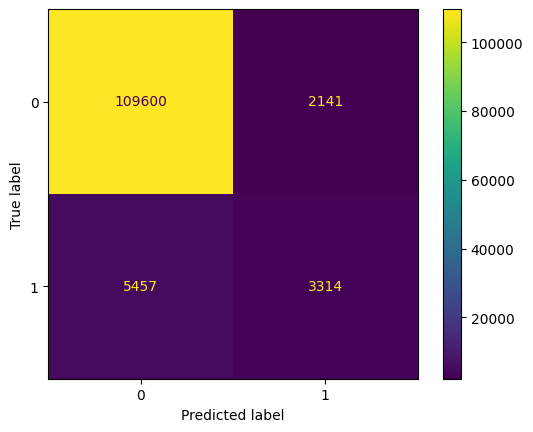

In [32]:
# Create the confusion matrix
cm = confusion_matrix(y_test, predicciones)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [33]:
predicciones = modelo.predict(X)
len(predicciones)

602560

In [34]:
df = pd.DataFrame({'probabilidad_de_aceptar':predicciones})
df

,probabilidad_de_aceptar
0,0.024083
1,0.003222
2,0.002569
3,-0.001019
4,0.002581
...,...
602555,0.035544
602556,0.027612
602557,-0.000314
602558,0.019501


In [35]:
tabla_con_id_cliente_mas_probabilidad = pd.merge(tabla_con_id_cliente, df, left_index=True, right_index=True)

tabla_con_id_cliente_mas_probabilidad

,CT_CTE,DEBITO_DIR,ID_EMPLEADO,ID_SEGMENTO_VALOR,ANTIGUEDAD,ID_CLIENTE,RENTA,EDAD,EDAD_PUNTAJE,ID_GENERO,ACEPTADO,probabilidad_de_aceptar
0,1.0,0.0,0.0,2.0,6.0,1375586.0,87218.10,36.0,3.0,1.0,0.0,0.024083
1,1.0,0.0,0.0,1.0,35.0,1050612.0,122179.11,23.0,1.0,0.0,0.0,0.003222
2,0.0,0.0,0.0,1.0,35.0,1050613.0,119775.54,23.0,1.0,1.0,0.0,0.002569
3,1.0,0.0,0.0,1.0,35.0,1050615.0,22220.04,24.0,1.0,1.0,0.0,-0.001019
4,1.0,0.0,0.0,1.0,35.0,1050616.0,295590.36,24.0,1.0,1.0,0.0,0.002581
...,...,...,...,...,...,...,...,...,...,...,...,...
602555,0.0,0.0,0.0,2.0,62.0,899549.0,97397.16,41.0,6.0,1.0,0.0,0.035544
602556,0.0,0.0,0.0,2.0,7.0,1441442.0,168445.62,34.0,2.0,0.0,0.0,0.027612
602557,0.0,0.0,0.0,1.0,6.0,1454431.0,53689.02,24.0,1.0,1.0,0.0,-0.000314
602558,0.0,0.0,0.0,2.0,229.0,56812.0,64404.21,61.0,7.0,0.0,0.0,0.019501


In [ ]:
tabla_con_id_cliente_mas_probabilidad.to_csv(r'C:\Users\marti\Desktop\Capstone\procesamiento de datos\Resultados_Boosting_Tree.csv', index=False, header=True)